# Set-Up

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../data/data.db')
c = conn.cursor()

def execute_statement(statement):
    c.execute(statement)
    res = c.fetchall()
    column_names = [description[0] for description in c.description]
    return pd.DataFrame(res, columns=column_names)

# Exploring Falcons In The Database
There are 176,062 trade records involving falcons (a falcon is any species belonging to the genus _Falco_), and 43 different species of falcon found in the database.

In [3]:
execute_statement('''SELECT Count(Taxon) AS "Number of Falcon", Count(DISTINCT Taxon) AS "Species of Falcon"
                     FROM cites WHERE Genus = "Falco"''')

,Number of Falcon,Species of Falcon
0,176062,43


The cell below uses an SQL query to get the values for a bar chart, and then Pandas and Matplotlib are used to plot this graph. The graph shows the number of records for each of the 10 most frequent falcon species in the CITES database.

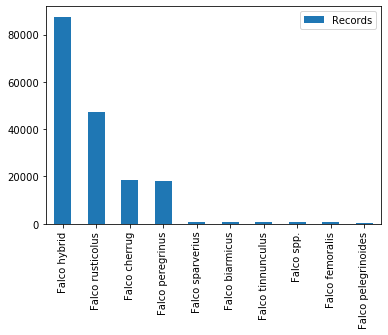

In [4]:
# SQL statement to get bar chart values
res = execute_statement('''SELECT Taxon, Count(Taxon) AS Records
                        FROM cites
                        WHERE Genus = "Falco"
                        GROUP BY Taxon
                        ORDER BY Count(Taxon) DESC
                        LIMIT 10''')

# Plot bar chart
ax = res.plot(kind='bar')
ax.set_xticklabels(res.Taxon)
plt.show()

The SQL statement below shows the species of falcon that are in the CITES database, as well as having been found in Leicestershire.

In [5]:
execute_statement('''SELECT LeicestershireBirds.Taxon
                     FROM LeicestershireBirds
                     INNER JOIN (SELECT Taxon, Genus FROM cites WHERE Genus = "Falco" GROUP BY Taxon) AS Cit
                     ON LeicestershireBirds.Taxon = Cit.Taxon
                     WHERE Cit.Genus = "Falco"''')

,Taxon
0,Falco tinnunculus
1,Falco vespertinus
2,Falco columbarius
3,Falco subbuteo
4,Falco peregrinus


# Falcon Entries Over Time

The cell below creates a line graph of the number of falcon records per year, showing that the number of falcon records has been increasing yearly since 2000. The years 2019 and 2020 has been excluded due to incomplete records.

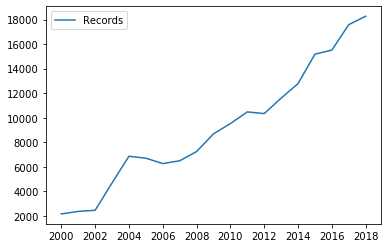

In [6]:
res = execute_statement('''SELECT Year, Count(Year) AS "Records"
                           FROM cites
                           WHERE Genus = "Falco" and Year < 2019
                           GROUP BY Year
                           ORDER BY Year''')

ax = res.plot(kind='line', y='Records', xticks=res.index[::2])
ax.set_xticklabels(res.Year[::2])
plt.show()

We can also work out what proportion of the records each year are falcon records by dividing the yearly falcon totals by the overall yearly totals. A line graph plotted with these results show that falcon records are representing an increasingly large proportion of the total CITES records.

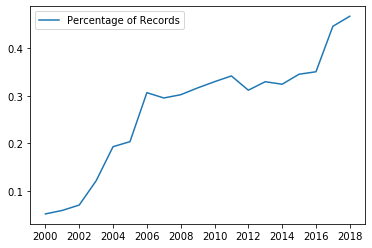

In [7]:
res = execute_statement('''SELECT cites.Year, CAST(FalconRecords.Records AS FLOAT) / COUNT(cites.Year) AS "Percentage of Records"
                           FROM cites
                           INNER JOIN (SELECT Year, Count(Year) AS "Records"
                                       FROM cites
                                       WHERE Genus = "Falco" and Year < 2019
                                       GROUP BY Year) AS FalconRecords
                           ON cites.Year = FalconRecords.Year
                           WHERE cites.Year < 2019
                           GROUP BY cites.Year
                           ORDER BY cites.Year''')


ax = res.plot(kind='line', y='Percentage of Records', xticks=res.index[::2])
ax.set_xticklabels(res.Year[::2])
plt.show()